Import Liberaries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Import DataSet

In [5]:
data = pd.read_csv('C:/Users/aditi/Desktop/election_results_2024.csv')
data

,Constituency,Const. No.,Leading Candidate,Leading Party,Lost Candidate,Lost Party,Margin,Status
0,AJMER,13.0,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8.0,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1.0,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3.0,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7.0,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
...,...,...,...,...,...,...,...,...
539,Wardha,8.0,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared
540,Wayanad,4.0,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared
541,West Delhi,6.0,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared
542,Yavatmal- Washim,14.0,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared


1.Finding Highest and Lowest Margin

In [4]:
#grouping on the basis of leading party
votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending = False)
data['Margin'] = pd.to_numeric(data['Margin'], errors = 'coerce')

highest_margin = data.loc[data['Margin'].idxmax()]
lowest_margin = data.loc[data['Margin'].idxmin()]



2. Plotting Graph for number of Seats won by Parties

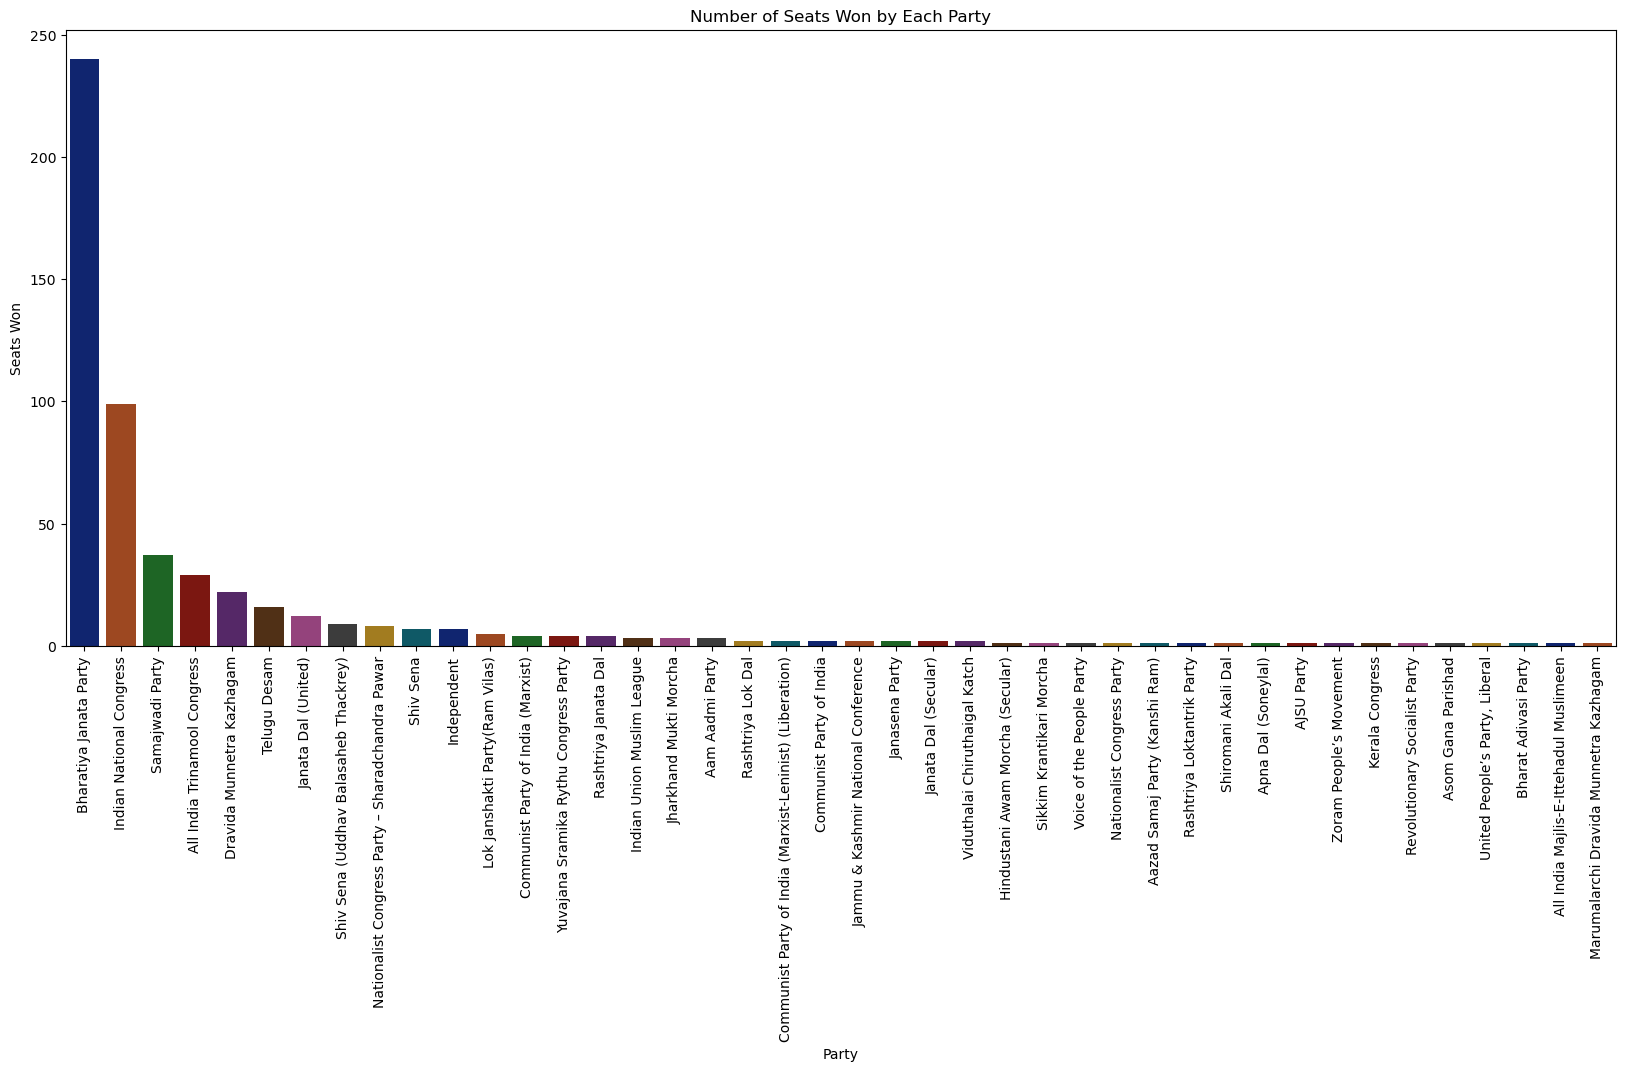

In [13]:
leading_party_highest_votes = votes.idxmax()
leading_party_lowest_votes = votes.idxmin()
#number of seats won by each party
seats_won = data['Leading Party'].value_counts()
#plotting
plt.figure(figsize=(20, 8))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='dark')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()

3.Frequently Loosing Party

In [62]:
most_frequent_losing_party = data['Lost Party'].value_counts().idxmax()
most_frequent_losing_party

'Indian National Congress'

4.Frequently Leading Party

In [63]:
most_frequent_leading_party = data['Leading Party'].value_counts().idxmax()
most_frequent_leading_party

'Bharatiya Janata Party'

5.Average victory margin

In [60]:
average_margin = data['Margin'].mean()
average_margin

162350.08302583024

6.Finding data entries of Narendra Modi, Rahul Gandhi and Amit Shah

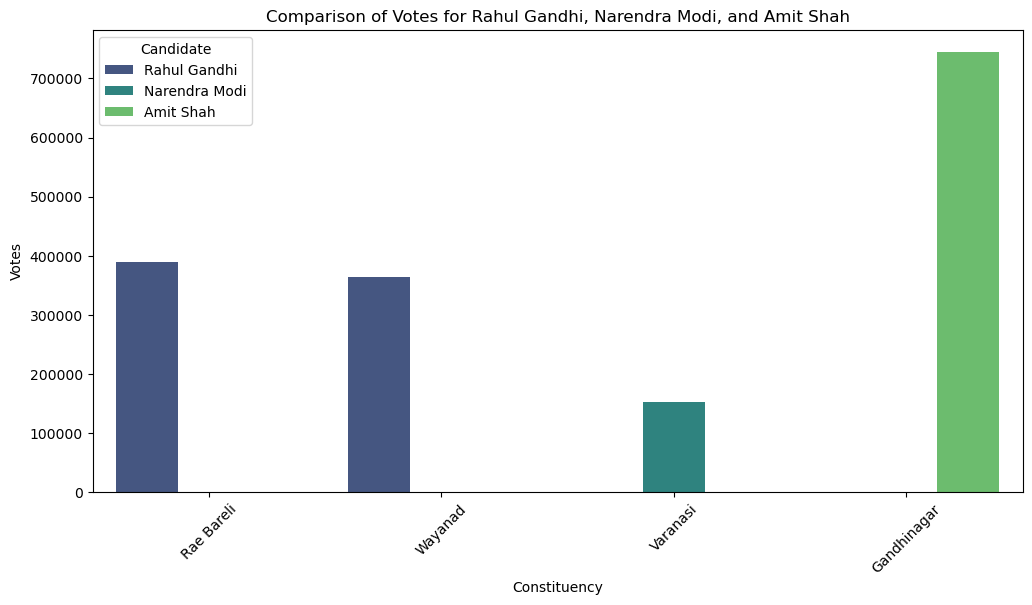

In [74]:


# Finding entries of Rahul Gandhi, Narendra Modi and Amit Shah
rahul_entries = data[data['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries = data[data['Leading Candidate'] == 'NARENDRA MODI']
shah_entries = data[data['Leading Candidate'] == 'AMIT SHAH']

# Finding the vote margins of the three
modi_votes = list(modi_entries['Margin'].values)
rahul_votes = list(rahul_entries['Margin'].values) if not rahul_entries.empty else [0]
shah_votes = list(shah_entries['Margin'].values) if not shah_entries.empty else [0]

# Getting the original constituency name for Narendra Modi
modi_constituency = list(modi_entries['Constituency'].values) if not modi_entries.empty else ["Modi Constituency"]

# Getting the original constituency names for Rahul Gandhi
rahul_constituencies = list(rahul_entries['Constituency'].values) if not rahul_entries.empty else ["Rahul Constituency"]

# Getting the original constituency name for Amit Shah
shah_constituency = list(shah_entries['Constituency'].values) if not shah_entries.empty else ["Amit Shah Constituency"]

# Combining the data
data_to_plot = pd.DataFrame({
    'Candidate': (['Rahul Gandhi'] * len(rahul_votes)) + ['Narendra Modi'] * len(modi_votes) + ['Amit Shah'] * len(shah_votes),
    'Constituency': rahul_constituencies + modi_constituency + shah_constituency,
    'Votes': rahul_votes + modi_votes + shah_votes
})

# Ensuring that the 'Votes' column is numeric
data_to_plot['Votes'] = pd.to_numeric(data_to_plot['Votes'])

# Plotting the comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='viridis')
plt.title('Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()


7.Highest and lowest victory candidate

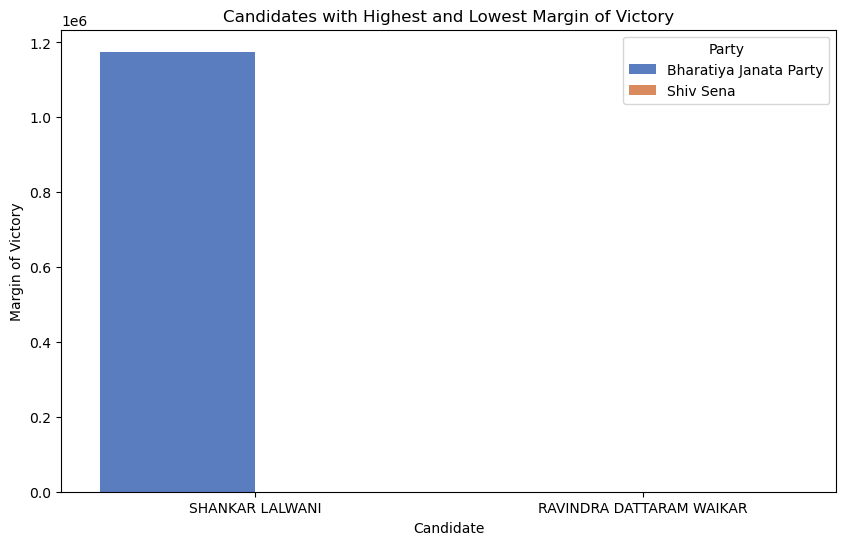

In [34]:


# Ensuring that the 'Margin' column is numeric
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')

# Drop rows with NaN values in 'Margin' column if any
data = data.dropna(subset=['Margin'])

# Find the entries with the highest and lowest margin
highest_margin_entry = data.loc[data['Margin'].idxmax()]
lowest_margin_entry = data.loc[data['Margin'].idxmin()]

# Combining the data into a new DataFrame
data_to_plot = pd.DataFrame({
    'Candidate': [highest_margin_entry['Leading Candidate'], lowest_margin_entry['Leading Candidate']],
    'Party': [highest_margin_entry['Leading Party'], lowest_margin_entry['Leading Party']],
    'Margin': [highest_margin_entry['Margin'], lowest_margin_entry['Margin']]
})

# Plotting the comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=data_to_plot, x='Candidate', y='Margin', hue='Party', palette='muted')
plt.title('Candidates with Highest and Lowest Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=0)
plt.show()



Histogram

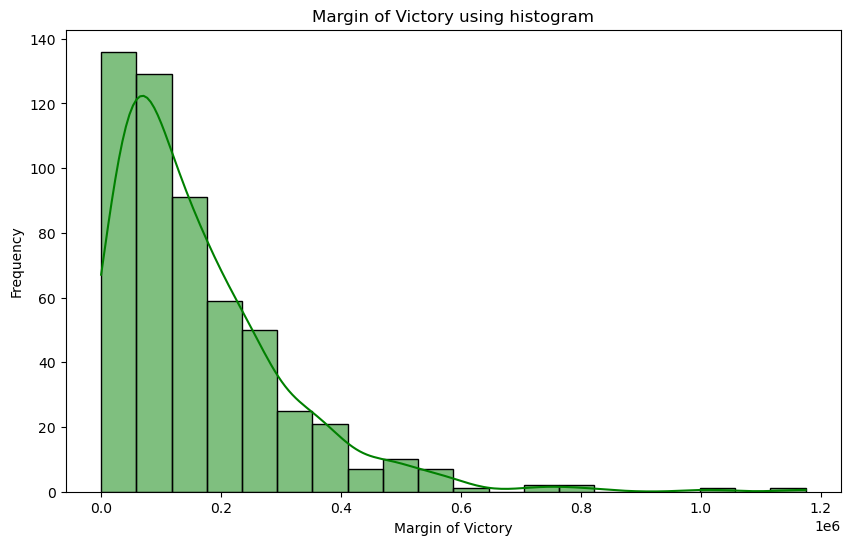

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Margin'], bins=20,color='green', kde=True)
plt.title('Margin of Victory using histogram')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

8. votes distribution among parties

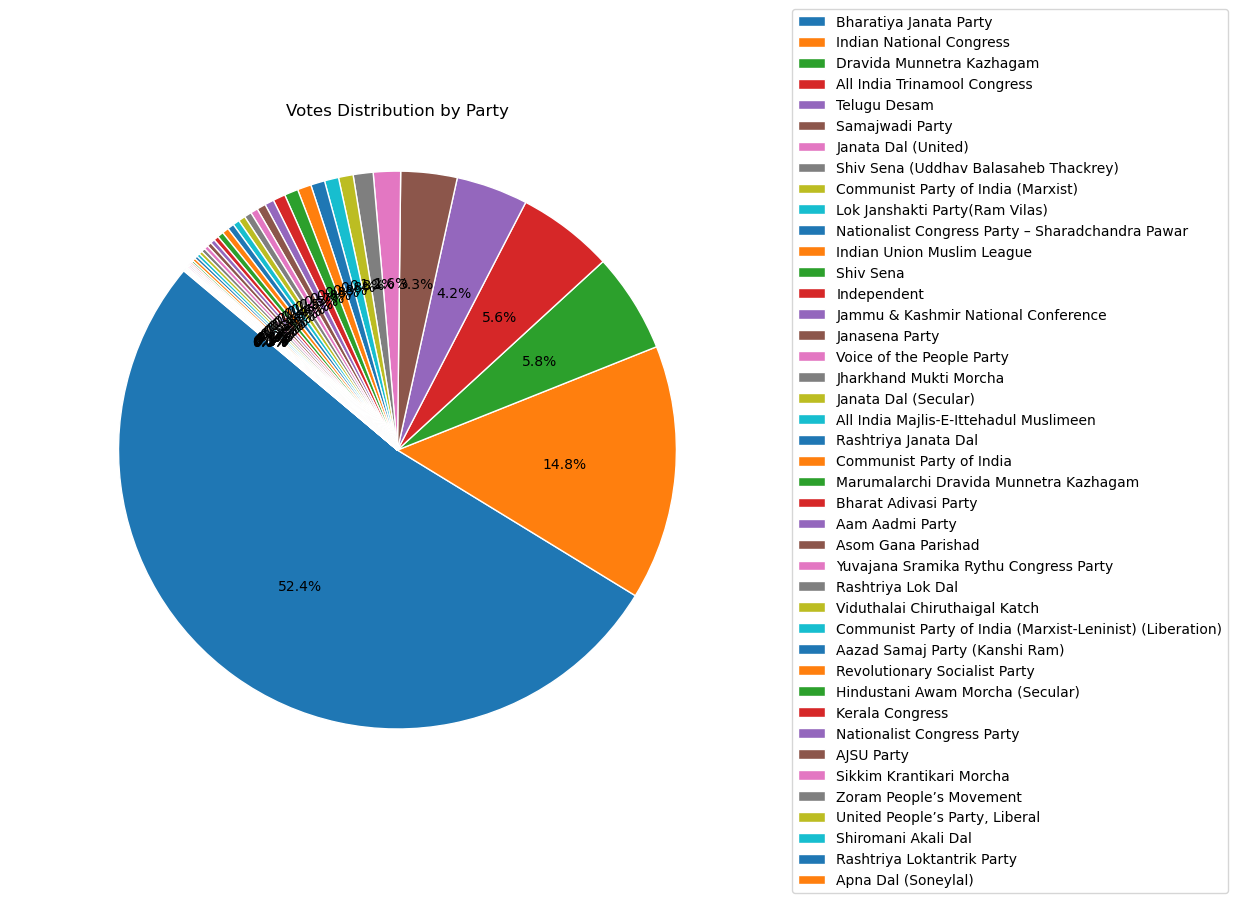

In [72]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plotting the pie chart
plt.figure(figsize=(10, 8))

wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%' , startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()

9. Top 10 leading parties 

In [44]:
leading_party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
leading_party_seats = data['Leading Party'].value_counts()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bharatiya Janata Party'),
  Text(1, 0, 'Indian National Congress'),
  Text(2, 0, 'Dravida Munnetra Kazhagam'),
  Text(3, 0, 'All India Trinamool Congress'),
  Text(4, 0, 'Telugu Desam'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Janata Dal (United)'),
  Text(7, 0, 'Shiv Sena (Uddhav Balasaheb Thackrey)'),
  Text(8, 0, 'Communist Party of India (Marxist)'),
  Text(9, 0, 'Lok Janshakti Party(Ram Vilas)')])

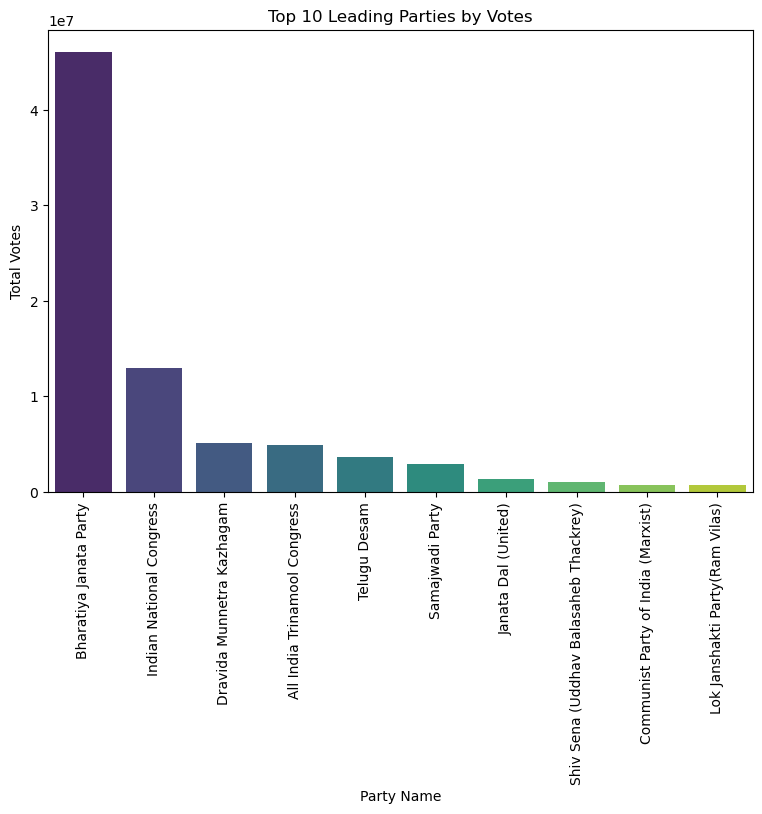

In [49]:
plt.figure(figsize=(20, 6))

# Plot votes distribution by leading party
plt.subplot(1, 2, 1)
sns.barplot(x=leading_party_votes.index[:10], y=leading_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Leading Parties by Votes')
plt.xlabel('Party Name')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)

10.Top 10 leading parties by seats

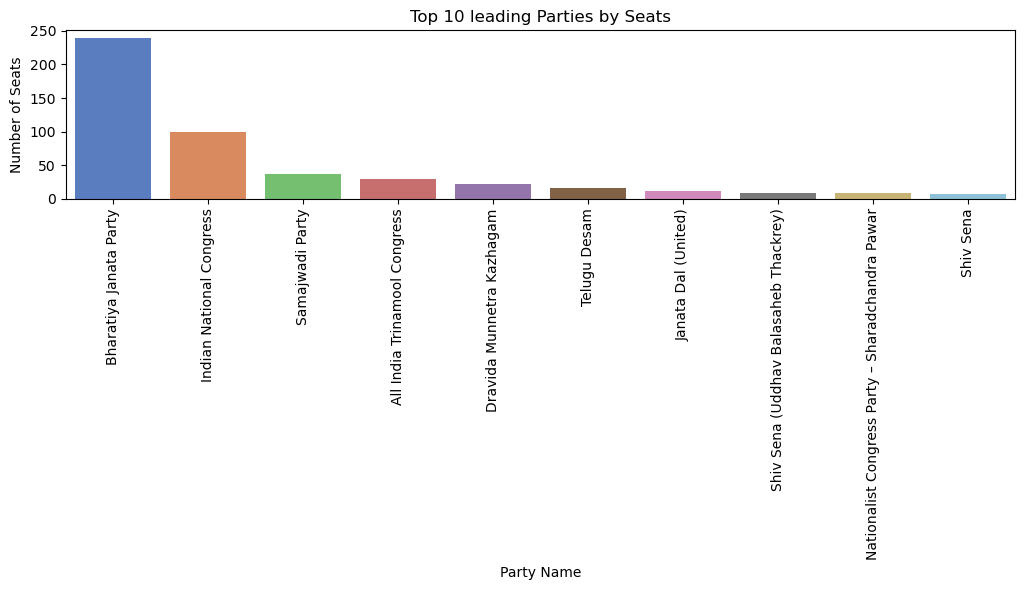

In [53]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=leading_party_seats.index[:10], y=leading_party_seats.values[:10], palette='muted')
plt.title('Top 10 leading Parties by Seats')
plt.xlabel('Party Name')
plt.ylabel('Number of Seats')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

11. Top 10 lost parties by votes

In [56]:
loosing_party_votes = data.groupby('Lost Party')['Margin'].sum().sort_values(ascending=True)
loosing_party_seats = data['Lost Party'].value_counts()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Pattali Makkal Katch'),
  Text(1, 0, 'Janata Dal (Secular)'),
  Text(2, 0, 'Nationalist Democratic Progressive Party'),
  Text(3, 0, 'Bodoland Peoples Front'),
  Text(4, 0, 'Telugu Desam'),
  Text(5, 0, 'Mizo National Front'),
  Text(6, 0, 'Citizen Action Party-Sikkim'),
  Text(7, 0, 'Naga Peoples Front'),
  Text(8, 0, 'Kerala Congress (M)'),
  Text(9, 0, 'Apna Dal (Soneylal)')])

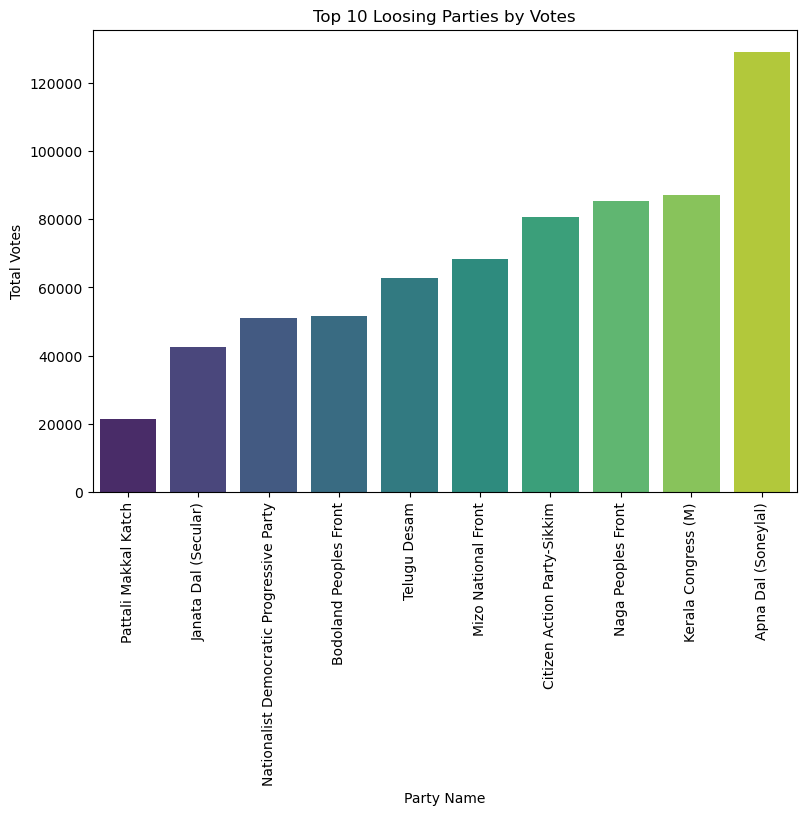

In [57]:
plt.figure(figsize=(20, 6))

# Plot votes distribution by loosing party
plt.subplot(1, 2, 1)
sns.barplot(x=loosing_party_votes.index[:10], y=loosing_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Loosing Parties by Votes')
plt.xlabel('Party Name')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)

12. Top 10 loosing parties by seats

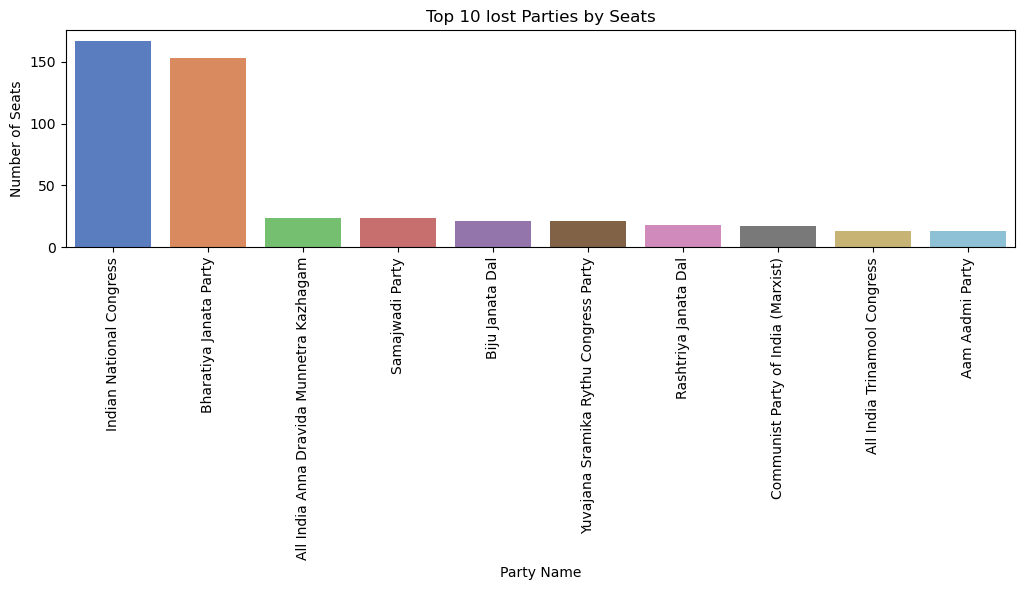

In [58]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=loosing_party_seats.index[:10], y=loosing_party_seats.values[:10], palette='muted')
plt.title('Top 10 lost Parties by Seats')
plt.xlabel('Party Name')
plt.ylabel('Number of Seats')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()